In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: ylabel='Geography'>

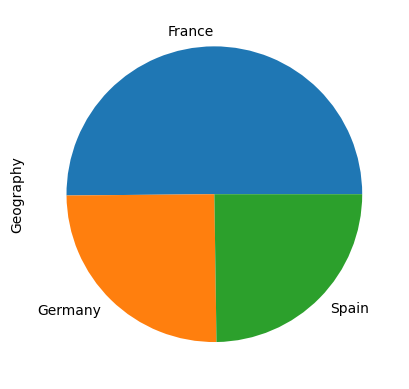

In [3]:
df["Geography"].value_counts().plot(kind="pie")

In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
X = df.drop("EstimatedSalary", axis = 1)
y = df["EstimatedSalary"]

In [6]:
X.drop(["RowNumber", "CustomerId", "Surname"], axis = 1, inplace=True)

In [7]:
X.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,France,Female,42,2,0.00,1,1,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,1
3,699,France,Female,39,1,0.00,2,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,0


In [8]:
y.head(5)

0    101348.88
1    112542.58
2    113931.57
3     93826.63
4     79084.10
Name: EstimatedSalary, dtype: float64

In [9]:
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited'],
      dtype='object')

In [10]:
geography = pd.get_dummies(X['Geography'], drop_first = True)
gender = pd.get_dummies(X['Gender'], drop_first = True)


In [11]:
## Concantenate these variables with df

X.drop(["Geography", 'Gender'], axis = 1, inplace = True)

In [12]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,42,2,0.00,1,1,1,1
1,608,41,1,83807.86,1,0,1,0
2,502,42,8,159660.80,3,1,0,1
3,699,39,1,0.00,2,0,0,0
4,850,43,2,125510.82,1,1,1,0
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,0
9996,516,35,10,57369.61,1,1,1,0
9997,709,36,7,0.00,1,0,1,1
9998,772,42,3,75075.31,2,1,0,1


In [13]:
X = pd.concat([X,geography,gender], axis = 1)

In [14]:
# Splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

# For which all alghoritms feature scaling is required?
* ANN
* Logistic
* KNN
* K-Means

**Distance based Problems, Gradient Descent**

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [16]:
X_train[:5]

array([[ 0.16958176, -0.46460796,  0.00666099, -1.21571749,  0.8095029 ,
         0.64259497, -1.03227043, -0.50624244, -0.5698444 ,  1.74309049,
        -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, -0.00631193, -0.92159124,
         0.64259497,  0.9687384 , -0.50624244,  1.75486502, -0.57369368,
         0.91601335],
       [-1.19119591, -0.94312892, -1.031415  ,  0.57993469, -0.92159124,
         0.64259497, -1.03227043, -0.50624244, -0.5698444 , -0.57369368,
        -1.09168714],
       [ 0.03556578,  0.10961719,  0.00666099,  0.47312769, -0.92159124,
         0.64259497, -1.03227043, -0.50624244, -0.5698444 ,  1.74309049,
         0.91601335],
       [ 2.05611444,  1.73658844,  1.04473698,  0.8101927 ,  0.8095029 ,
         0.64259497,  0.9687384 , -0.50624244, -0.5698444 ,  1.74309049,
        -1.09168714]])

In [17]:
X_test[5:]

array([[ 0.20050853,  1.73658844, -0.68538967, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.62420521, -0.46460796, -1.72346566, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.14999481, -0.94312892,  0.35268632, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [18]:
X_train.shape

(8000, 11)

In [19]:
X_test.shape

(2000, 11)

In [23]:
# Experiments

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="relu")
])

model.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model.fit(X_train, y_train, batch_size=10, epochs=100, verbose = 0)


In [24]:
# Experiments

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
])

model_2.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mse"]
)

model_2.fit(X_train, y_train, batch_size=25, epochs=100, verbose = 0)


In [25]:
# Experiments

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="relu")
])

model_3.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

model_3.fit(X_train, y_train, batch_size=10, epochs=100, verbose = 0)


In [26]:
# Experiments

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="relu"),
])

model_4.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

model_4.fit(X_train, y_train, batch_size=25, epochs=300, verbose = 0)


In [27]:
# Experiments

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="relu"),
])

model_5.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model_5.fit(X_train, y_train, batch_size=25, epochs=150, verbose = 0)


In [28]:
print("Model 5: ",model_5.evaluate(X_test, y_test))
print("Model 4: ",model_4.evaluate(X_test, y_test))
print("Model 3: ",model_3.evaluate(X_test, y_test))
print("Model 2: ",model_2.evaluate(X_test, y_test))
print("Model 1: ",model.evaluate(X_test, y_test))

63/63 [==============================] - 0s 1ms/step - loss: 53885.7852 - mae: 53885.7852
Model 5:  [53885.78515625, 53885.78515625]
63/63 [==============================] - 0s 1ms/step - loss: 49856.1602 - mae: 49856.1602
Model 4:  [49856.16015625, 49856.16015625]
63/63 [==============================] - 0s 1ms/step - loss: 49888.8984 - mae: 49888.8984
Model 3:  [49888.8984375, 49888.8984375]
63/63 [==============================] - 0s 1ms/step - loss: 3474695936.0000 - mse: 3474695936.0000
Model 2:  [3474695936.0, 3474695936.0]
63/63 [==============================] - 0s 2ms/step - loss: 99753.6875 - mae: 99753.6875
Model 1:  [99753.6875, 99753.6875]


In [38]:
y_pred_5 = model_5.predict(X_test)
y_pred_4 = model_4.predict(X_test)
y_pred_3 = model_3.predict(X_test)
y_pred_2 = model_2.predict(X_test)
y_pred_1 = model.predict(X_test)

print("Model 5 MAE: ", tf.keras.losses.MAE(y_test,y_pred_5).numpy()[:3])
print("Model 4 MAE: ", tf.keras.losses.MAE(y_test,y_pred_4).numpy()[:3])
print("Model 3 MAE: ", tf.keras.losses.MAE(y_test,y_pred_3).numpy()[:3])
y_pred_class_0 = y_pred_2[:, 0]
# Calculate the MAE for class 0
mae = tf.keras.losses.MAE(y_test, y_pred_class_0)
print("Model 2 MAE for class 0: ", mae.numpy())
print("Model 1 MAE: ", tf.keras.losses.MAE(y_test,y_pred_1).numpy()[:3])

63/63 [==============================] - 0s 1ms/step
Model 5 MAE:  [52851.062 49596.465 51055.54 ]
Model 4 MAE:  [50357.246 49748.688 49511.51 ]
Model 3 MAE:  [50421.12  49718.113 49518.32 ]
Model 2 MAE for class 0:  50380.45
Model 1 MAE:  [99762.06 99762.06 99762.06]


<h1>Earyl_Stopping:</h1> Stop training when a monitored metric has stopped improving



In [69]:
tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", # Quantity to be monitored
    min_delta=0, # Minimum change in the monitored quantity
    patience=0, # Number of epochs with no improvement after which training will be stopped
    verbose=0,
    mode="auto", # Mode: {"auto", "min", "max"}
    baseline=None, # Baseline value for the monitored quantity, training will stop if the model doesn't show improvement over the baseline
    restore_best_weights=False,
    start_from_epoch=0, #  Number of epochs to wait before starting to monitor improvement.
)

** How To Use It?**



```
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.

model = tf.keras.models.Sequential([tf.keras.layers.Dense(10)])
model.compile(tf.keras.optimizers.SGD(), loss='mse')

history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),

                     epochs=10, batch_size=1, callbacks=[callback],
                     verbose=0)
                     
 len(history.history['loss'])  # Only 4 epochs are run.
```

